In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        gs = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        #cv2.imshow("frame", frame)            
        
        img = frame
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

        cor1 = (0, 30, 10)
        cor2 = (35, 200, 200)

        mask = cv2.inRange(hsv, cor1, cor2)
        result = cv2.bitwise_and(img, img, mask=mask)

        #mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(9,9)))
        #mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(9,9)))

        mask = cv2.dilate(mask, cv2.getStructuringElement(cv2.MORPH_RECT,(9, 9)), 3)

        #plt.imshow(mask)

        inpainted = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)
        cv2.imshow("frame", frame)
        cv2.imshow("inpaint", inpainted)

#         if cv2.waitKey(1):
#             if 0xFF == ord("t"):
#                 cv2.imshow("foto", frame)
        
        key = cv2.waitKey(1) & 0xFF
        
        if key == ord("t"):
            cv2.imshow("frame_orig", frame)
            cv2.imshow("foto", inpainted)
        if key == ord("q"):
            break

cap.release()
cv2.destroyAllWindows()

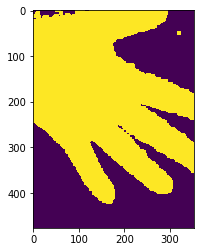

In [8]:
img = cv2.imread("hand.png", 1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

cor1 = (0, 30, 10)
cor2 = (35, 200, 200)


mask = cv2.inRange(hsv, cor1, cor2)
result = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(mask)

#mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(9,9)))

#mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(9,9)))

mask = cv2.dilate(mask, cv2.getStructuringElement(cv2.MORPH_RECT,(9, 9)), 3)

plt.imshow(mask)



inpainted = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

#plt.imshow(inpainted)

